LGBM & XGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
from sklearn.model_selection import GridSearchCV, cross_val_score
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
train_data1=pd.read_csv("Titanic_train1.csv")
test_data1=pd.read_csv("Titanic_test1.csv")
train_data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test_data1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Finding out missing values in the dataset 
train_data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train_data1.describe().round(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.0000,891.0000,891.0000,714.0000,891.0000,891.0000,891.0000
mean,446.0000,0.3838,2.3086,29.6991,0.5230,0.3816,32.2042
std,257.3538,0.4866,0.8361,14.5265,1.1027,0.8061,49.6934
min,1.0000,0.0000,1.0000,0.4200,0.0000,0.0000,0.0000
25%,223.5000,0.0000,2.0000,20.1250,0.0000,0.0000,7.9104
50%,446.0000,0.0000,3.0000,28.0000,0.0000,0.0000,14.4542
75%,668.5000,1.0000,3.0000,38.0000,1.0000,0.0000,31.0000
max,891.0000,1.0000,3.0000,80.0000,8.0000,6.0000,512.3292


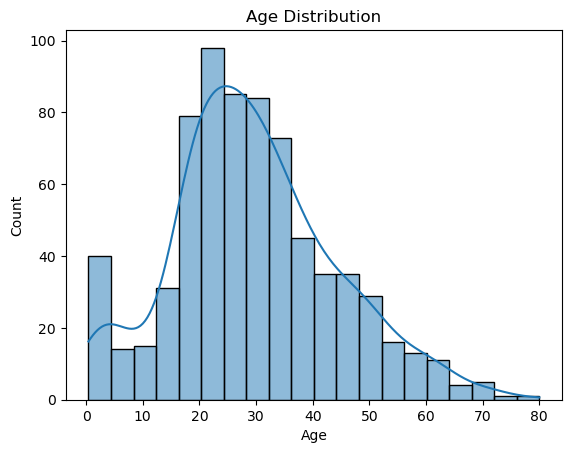

In [6]:
# Histogram plot to visualize the dataset 
sns.histplot(train_data1['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

In [7]:
#the distribution is right skewed with lot of younger people.

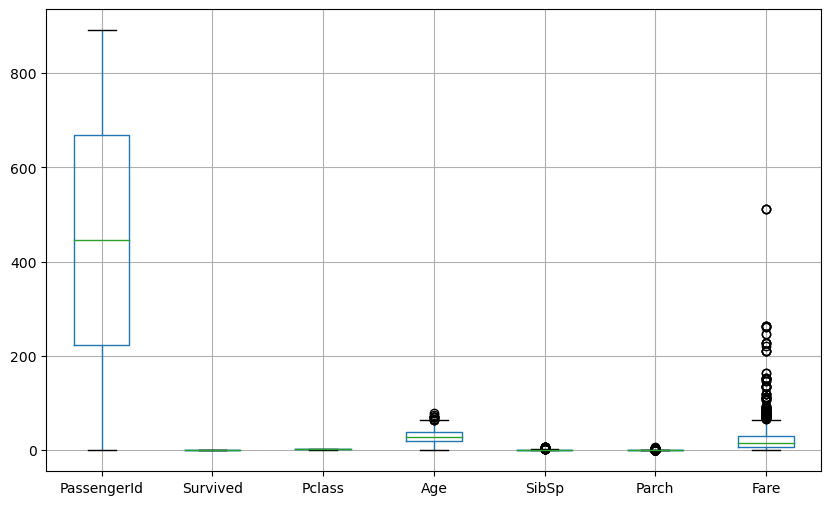

In [8]:
# Boxplot for the dataset 
train_data1.boxplot(figsize=(10,6))
plt.show()

In [9]:
# the age, sibsp, parch, fare have outliers which need to be treated

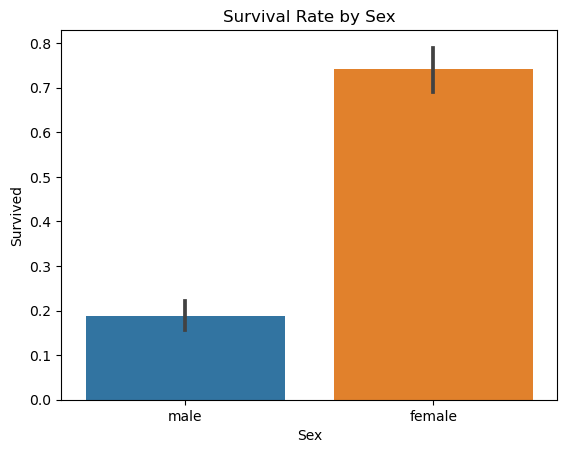

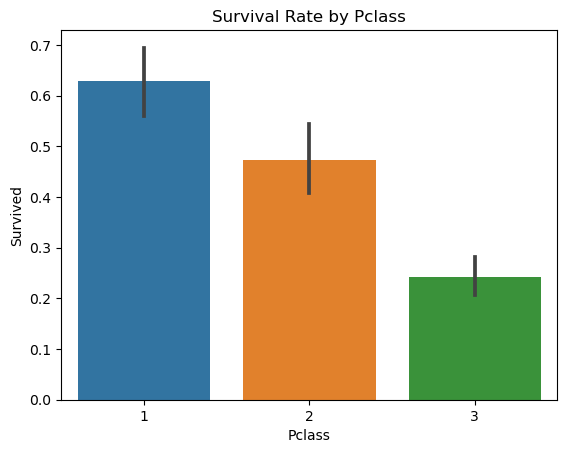

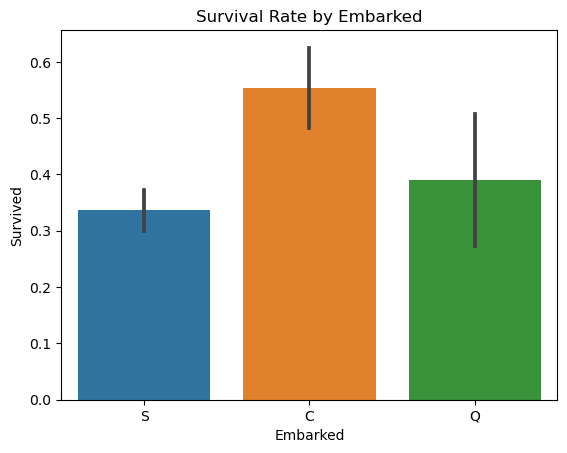

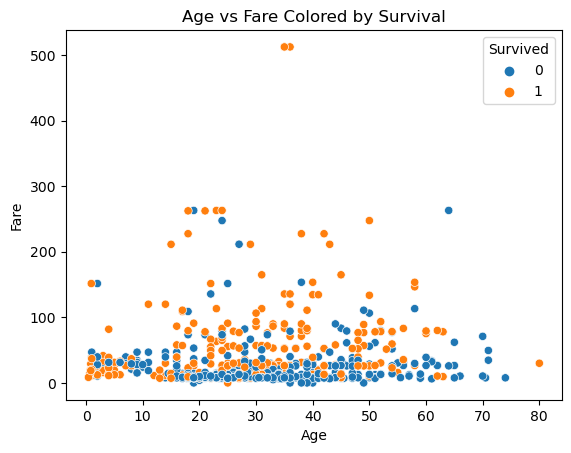

In [10]:
# bar plot
categorical = ['Sex', 'Pclass', 'Embarked']
for col in categorical:
    sns.barplot(x=col, y='Survived', data = train_data1)
    plt.title(f'Survival Rate by {col}')
    plt.show()

# Scatter plot 
sns.scatterplot(data = train_data1, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare Colored by Survival")
plt.show()

Fare seems to be positively correlated with survival meaning those who paid higher fare had more survival chance

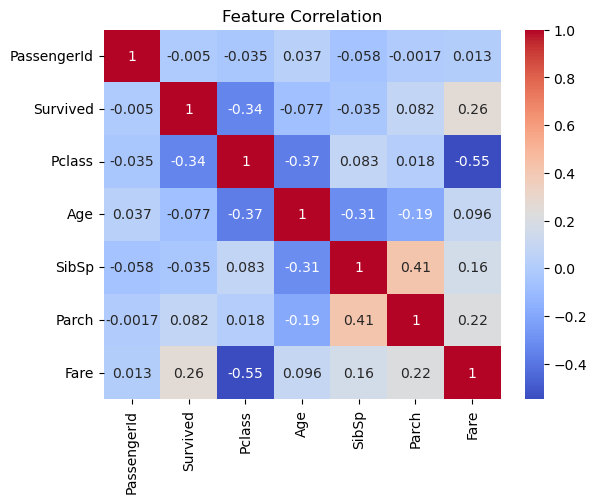

In [11]:
# Heat map Correlation
corr = train_data1.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

survived vs pclass = lower class survival rate is low than higher class 
survived vs fare = people who paid higer fare had higher survival rate
survived vs age = very weak negative correlation
fare vs class = -0.55 people who paid more fare.

In [12]:
# treating outliers 
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] > upper_bound, upper_bound,
                   np.where(df[column] < lower_bound, lower_bound, df[column]))
    return df

# Columns to treat
cols_outliers = ['Age', 'SibSp', 'Parch', 'Fare']

for col in cols_outliers:
    train_data1 = outliers(train_data1, col)

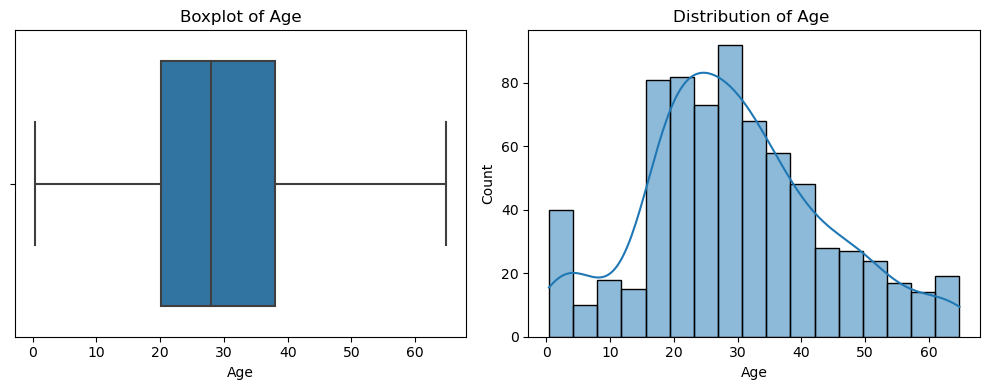

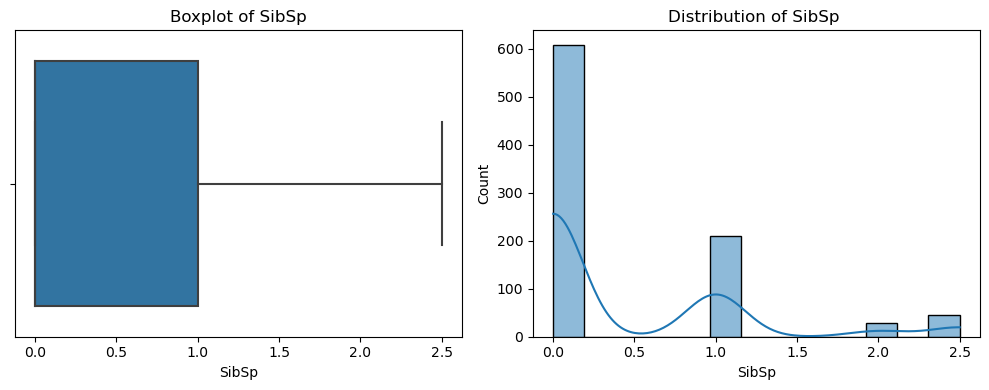

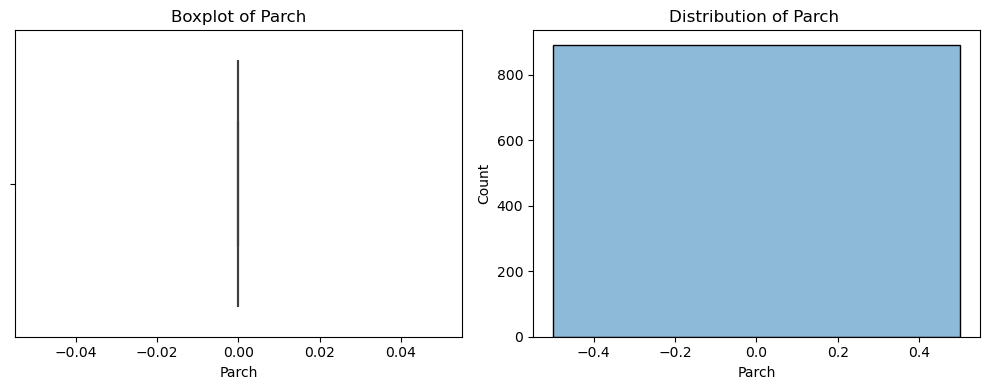

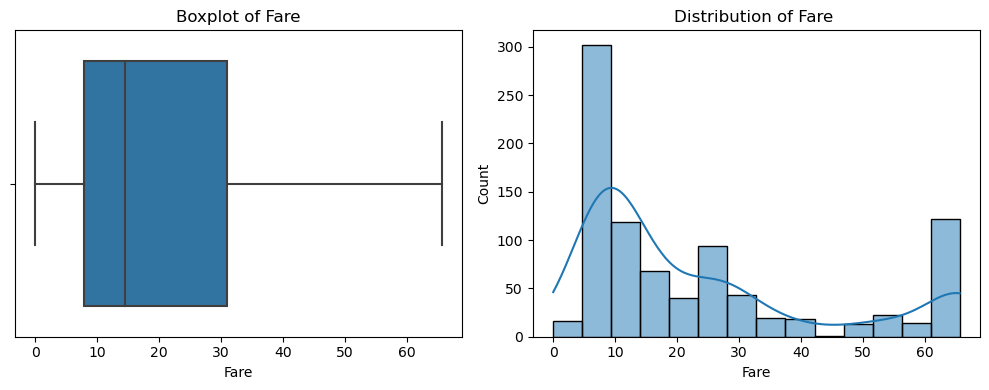

In [13]:
# Visualizing after treating outliers
for col in cols_outliers:
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.boxplot(x=train_data1[col], ax=ax[0])
    ax[0].set_title(f"Boxplot of {col}")
    
    sns.histplot(train_data1[col], kde=True, ax=ax[1])
    ax[1].set_title(f"Distribution of {col} ")
    
    plt.tight_layout()
    plt.show()

In [14]:
# the outliers are removed from the dataset mentioned earlier

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
imputer = SimpleImputer(strategy='median')
train_data1['Age'] = imputer.fit_transform(train_data1[['Age']])
train_data1['Embarked'].fillna(train_data1['Embarked'].mode()[0], inplace=True)
train_data1.drop(['Name','Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True)

In [16]:
# i have used simple imputer to handle missing value and label encoder to convert text to numbers or integers

In [17]:
train_data1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
# Encoding categorical value
label_encoder = LabelEncoder()
train_data1['Sex'] = label_encoder.fit_transform(train_data1['Sex'])
train_data1['Embarked'] = label_encoder.fit_transform(train_data1['Embarked'])

In [19]:
train_data1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1.0,0.0,7.2500,2
1,1,1,0,38.0,1.0,0.0,65.6344,0
2,1,3,0,26.0,0.0,0.0,7.9250,2
3,1,1,0,35.0,1.0,0.0,53.1000,2
4,0,3,1,35.0,0.0,0.0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0.0,0.0,13.0000,2
887,1,1,0,19.0,0.0,0.0,30.0000,2
888,0,3,0,28.0,1.0,0.0,23.4500,2
889,1,1,1,26.0,0.0,0.0,30.0000,0


In [20]:
Data_X = train_data1.drop('Survived', axis=1)
Data_Y = train_data1['Survived']

In [21]:
Data_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1.0,0.0,7.2500,2
1,1,0,38.0,1.0,0.0,65.6344,0
2,3,0,26.0,0.0,0.0,7.9250,2
3,1,0,35.0,1.0,0.0,53.1000,2
4,3,1,35.0,0.0,0.0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0.0,0.0,13.0000,2
887,1,0,19.0,0.0,0.0,30.0000,2
888,3,0,28.0,1.0,0.0,23.4500,2
889,1,1,26.0,0.0,0.0,30.0000,0


In [22]:
Data_Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [23]:
# train and test the dataset for the model 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train) 
# random forest is used for comparing the lightgbm and xgboost

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.8156424581005587
Precision: 0.7887323943661971
Recall: 0.7567567567567568
F1 Score: 0.7724137931034483

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



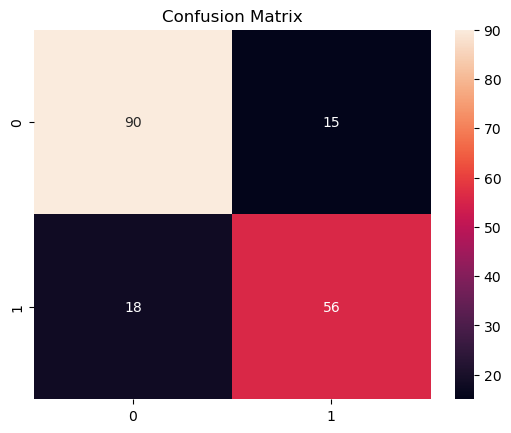

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
evaluate_model(model, X_test, y_test)
# A confusion matrix helps to understand how well model is performing in detail.

In [27]:
# Actual Negative (0) 	True Negative (TN) = 90  	False Positive (FP) = 15
# Actual Positive (1) 	False Negative (FN) = 19	True Positive (TP) = 55
#The model correctly classifies the majority of cases - 81% accuracy.
# precise when predicting survival - 79% precision.
# recall is 74%
#90 passengers were correctly predicted as not survived (TN)
#10 passengers were wrongly predicted as survived (FP)
#20 passengers were wrongly predicted as not survived (FN)
#50 passengers were correctly predicted as survived (TP)

In [28]:
# LightGBM stands for Light Gradient Boosting Machine. XGBoost stands for Extreme Gradient Boosting.
# They are Good building predictive models in real-world problems.
# They outperform traditional models like logistic regression or single decision trees in many cases.

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


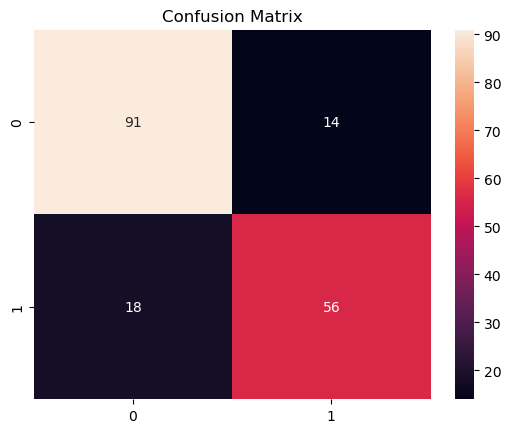

In [29]:
import xgboost as xgb
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
print("LightGBM Performance:")
evaluate_model(lgb_model, X_test, y_test)

In [30]:
# Lightgbm has 82 % accuracy and prescision is 80 % 

XGBoost Performance:
Accuracy: 0.776536312849162
Precision: 0.7361111111111112
Recall: 0.7162162162162162
F1 Score: 0.726027397260274

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



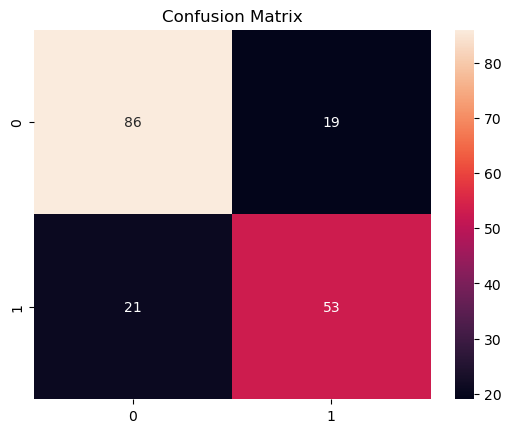

In [31]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Performance:")
evaluate_model(xgb_model, X_test, y_test)

In [32]:
# XGboost has Accuracy: 77%
# Precision: 73%

In [33]:
from sklearn.model_selection import cross_val_score

print("LightGBM CV accuracy:", cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy').mean())
print("XGBoost CV accuracy:", cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy').mean())


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 149
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[LightGBM] [Info] Number of positive: 178, number of negative: 296
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 134
[LightGBM] [Info] Number of data points in the train set: 474, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.375527 -> initscore=-0.508576
[LightGBM] [Info] Start training from score -0.508576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


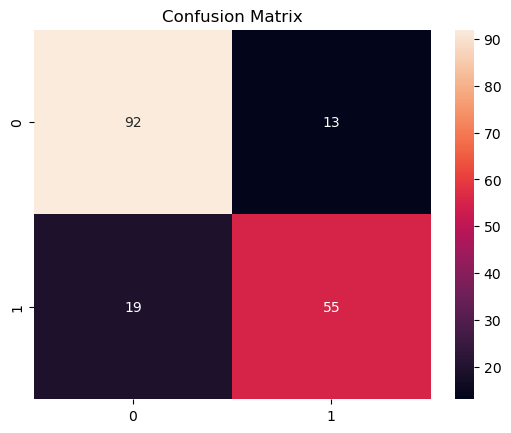

In [34]:
# Using hyperparameter to improve the model to predict the survivors by increasing the accuracy and precision of the models
# Grid Search is a technique to systematically explore a set of hyperparameter values for a machine learning model to find the best combination.
from sklearn.model_selection import GridSearchCV
param_grid_lgb = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}
grid_lgb = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid_lgb, cv=3, scoring='accuracy')
grid_lgb.fit(X_train, y_train)

print("Best LightGBM params:", grid_lgb.best_params_)

best_lgb = grid_lgb.best_estimator_
print("Tuned LightGBM Performance:")
evaluate_model(best_lgb, X_test, y_test)


Best XGBoost params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned XGBoost Performance:
Accuracy: 0.8212290502793296
Precision: 0.8387096774193549
Recall: 0.7027027027027027
F1 Score: 0.7647058823529411

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       105
           1       0.84      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



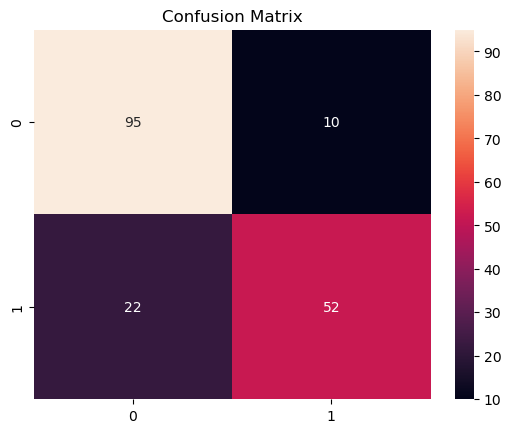

In [35]:
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}
grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), param_grid_xgb, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)
print("Best XGBoost params:", grid_xgb.best_params_)
best_xgb = grid_xgb.best_estimator_
print("Tuned XGBoost Performance:")
evaluate_model(best_xgb, X_test, y_test)

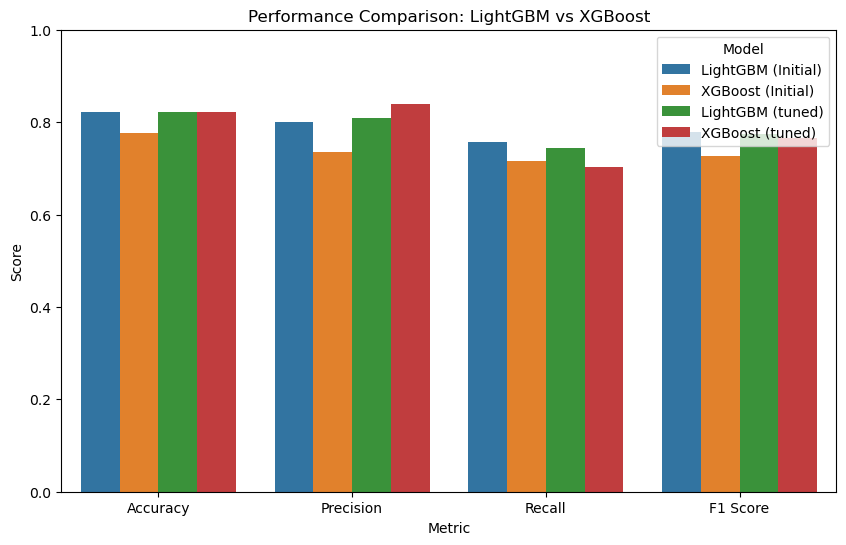

In [36]:
results = pd.DataFrame({
    'Model': ['LightGBM (Initial)', 'XGBoost (Initial)', 'LightGBM (tuned)', 'XGBoost (tuned)'],
    'Accuracy': [
        accuracy_score(y_test, lgb_model.predict(X_test)),
        accuracy_score(y_test, xgb_model.predict(X_test)),
        accuracy_score(y_test, best_lgb.predict(X_test)),
        accuracy_score(y_test, best_xgb.predict(X_test))
    ],
    'Precision': [
        precision_score(y_test, lgb_model.predict(X_test)),
        precision_score(y_test, xgb_model.predict(X_test)),
        precision_score(y_test, best_lgb.predict(X_test)),
        precision_score(y_test, best_xgb.predict(X_test))
    ],
    'Recall': [
        recall_score(y_test, lgb_model.predict(X_test)),
        recall_score(y_test, xgb_model.predict(X_test)),
        recall_score(y_test, best_lgb.predict(X_test)),
        recall_score(y_test, best_xgb.predict(X_test))
    ],
    'F1 Score': [
        f1_score(y_test, lgb_model.predict(X_test)),
        f1_score(y_test, xgb_model.predict(X_test)),
        f1_score(y_test, best_lgb.predict(X_test)),
        f1_score(y_test, best_xgb.predict(X_test))
    ]
})
results_melt = results.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Score', hue='Model', data=results_melt)
plt.title("Performance Comparison: LightGBM vs XGBoost")
plt.ylim(0, 1)
plt.show()

In [37]:
# after tuniing a comparative graph is given for further understanding of each models before tuning and after tuning both
# Initial -  LightGBM performs better than XGBoost overall.
# Both models improve with hyperparameter tuning.
# XGBoost benefits more in precision and F1 score after tuning.
# LightGBM maintains better recall after tuning.